посилання на colab -> https://colab.research.google.com/drive/1QMpyuTIG8DEWDGXlidXBo-7gQMGEZSiT?usp=sharing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

ЧАСТИНА 1: Кластеризація Iris

In [4]:
iris = load_iris()
x = iris.data

print(pd.DataFrame(x, columns=iris.feature_names).head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [5]:
# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [6]:
# вибір даних для кластеризації
# вибираємо всі рядки і всі стовпці, крім першого
X_2d = pd.DataFrame(X_scaled, columns=iris.feature_names).iloc[:, 1:]

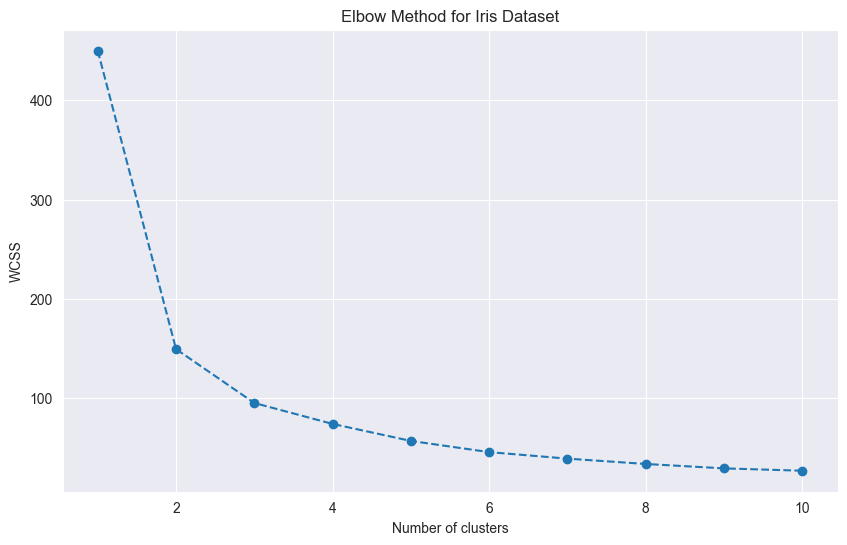

In [7]:
# Ліктевий метод
wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=17)
    kmeans.fit(X_2d)
    wcss_2d.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Elbow Method for Iris Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

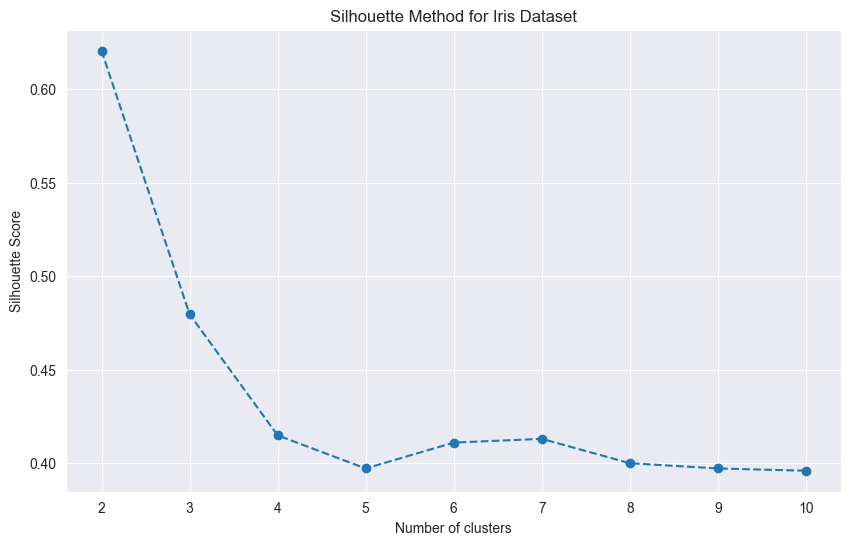

In [8]:
# Метод силуетів (Silhouette Method)
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=17)
    cluster_labels = kmeans.fit_predict(X_2d)
    silhouette_avg = silhouette_score(X_2d, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Iris Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

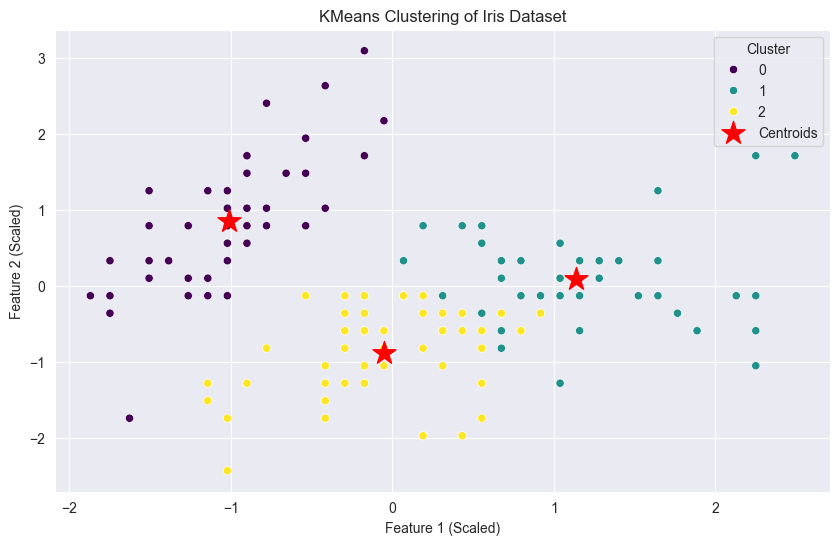

In [9]:
# Візуалізація кластерів
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=17)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

ЧАСТИНА 2: Класифікація Student Data

In [10]:
df = pd.read_csv('Student_data_pr_7.csv')

# Перевірка на пропущені значення
print("\nПеревірка на пропущені значення:", df.isnull().sum())


# Перевірка наявності дублікатів
print("\nПеревірка наявності дублікатів:", df.duplicated().sum())


# Описова статистика
print("\nОписова статистика:")
df.describe()


Перевірка на пропущені значення: StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Перевірка наявності дублікатів: 0

Описова статистика:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [11]:
# Підготовка даних
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Random Forest
print("Training Random Forest")
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=17)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
print(f"Best params RF: {grid_search_rf.best_params_}")
y_pred_rf = grid_search_rf.predict(X_test)

Training Random Forest
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best params RF: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [16]:
# Logistic Regression
print("Training Logistic Regression")
param_grid_lr = {
    'estimator__penalty': ['l1', 'l2'],
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__solver': ['liblinear', 'saga']
}

lr = OneVsRestClassifier(
    LogisticRegression(random_state=17, max_iter=1000)
)

grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search_lr.fit(X_train, y_train)
print(f"Best params LR: {grid_search_lr.best_params_}")
y_pred_lr = grid_search_lr.predict(X_test)

Training Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params LR: {'estimator__C': 0.1, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'}


In [17]:
# SVM
print("Training SVM")
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
svm = SVC(random_state=17)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)
print(f"Best params SVM: {grid_search_svm.best_params_}")
y_pred_svm = grid_search_svm.predict(X_test)

Training SVM
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best params SVM: {'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [18]:
print("Результати")
print("Test accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Test accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("Test accuracy (SVM):", accuracy_score(y_test, y_pred_svm))

Результати
Test accuracy (Random Forest): 0.9018789144050104
Test accuracy (Logistic Regression): 0.7118997912317327
Test accuracy (SVM): 0.860125260960334


ЧАСТИНА 3: Кластеризація Student Data

In [19]:
# Вибір числових стовпців для кластеризації
features = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]
scaler_cluster = StandardScaler()
X_scaled_students = scaler_cluster.fit_transform(features)

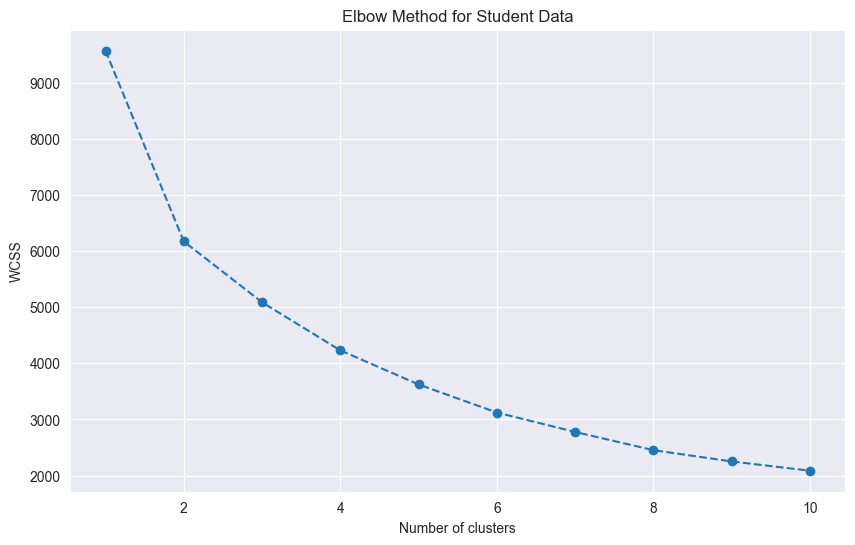

In [20]:
# Ліктевий метод
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled_students)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Student Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

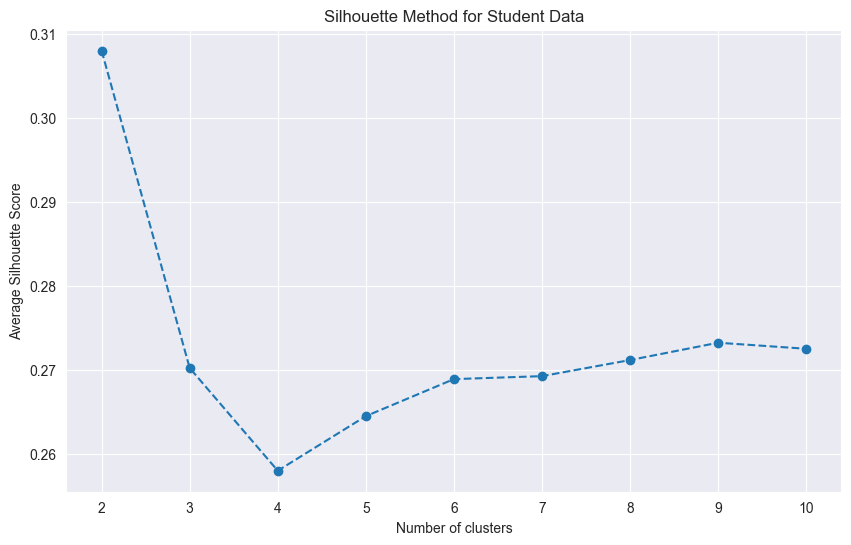

In [21]:
# Метод силуетів
silhouette_scores_students = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled_students)
    silhouette_avg = silhouette_score(X_scaled_students, cluster_labels)
    silhouette_scores_students.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_students, marker='o', linestyle='--')
plt.title('Silhouette Method for Student Data')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

ВИСНОВКИ: <br>
У ході виконання лабораторної роботи були застосовані методи кластеризації та класифікації на двох різних наборах даних: Iris та Student Data. Завдяки використанню методів ліктевого методу та силуетів було визначено оптимальну кількість кластерів для обох наборів даних.